# Training Results

##### Imports

In [1]:
%matplotlib inline

import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import matplotlib
import seaborn as sns

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'legend.fontsize': 3,
    'text.usetex': True,
    "pgf.rcfonts": False 
})

sys.path.append(os.path.dirname((os.path.abspath(""))))

from src.evaluation.visualization import line_plot, bar_chart, box_plot, set_size
from src.envs.obstacle_avoidance import ObstacleAvoidance, generate_obstacles

pd.options.display.max_columns = None
pd.options.display.max_rows = None

def export_legend(legend, filename="legend.pgf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, format='pgf', bbox_inches=bbox)
    
sns.set_theme()
sns.set_style("whitegrid")

##### Choose the training results file to analyze

In [2]:
# training_results_path = '../results/experiment_1/training_results.pkl'
training_results_path = '../results/experiment_2/training_results.pkl'

##### Choose the algorithms to plot

In [3]:
algorithms = ['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked']
# algorithms = ['TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked']
#algorithms = ['MPS-TD3', 'PAM']
# algorithms = ['MPS-TD3', 'PAM', 'PPO-Masked', 'TD3', 'TD3-Projection']

##### Import the training results

In [4]:
results_training = pd.read_pickle(training_results_path)
results_training.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_faulty_episodes,num_healthy_workers,num_in_flight_async_reqs,num_remote_worker_restarts,num_agent_steps_sampled,num_agent_steps_trained,num_env_steps_sampled,num_env_steps_trained,num_env_steps_sampled_this_iter,num_env_steps_trained_this_iter,timesteps_total,num_steps_trained_this_iter,agent_timesteps_total,done,episodes_total,training_iteration,trial_id,experiment_id,date,timestamp,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,custom_metrics/count_invalid_actions_mean,custom_metrics/count_invalid_actions_min,custom_metrics/count_invalid_actions_max,custom_metrics/solved_mean,custom_metrics/solved_min,custom_metrics/solved_max,custom_metrics/level_mean,custom_metrics/level_min,custom_metrics/level_max,custom_metrics/fraction_allowed_actions_mean,custom_metrics/allowed_interval_length_mean,custom_metrics/number_intervals_mean,custom_metrics/fraction_allowed_actions_avg_mean,custom_metrics/fraction_allowed_actions_avg_min,custom_metrics/fraction_allowed_actions_avg_max,custom_metrics/fraction_allowed_actions_max_mean,custom_metrics/fraction_allowed_actions_max_min,custom_metrics/fraction_allowed_actions_max_max,custom_metrics/fraction_allowed_actions_min_mean,custom_metrics/fraction_allowed_actions_min_min,custom_metrics/fraction_allowed_actions_min_max,custom_metrics/number_intervals_avg_mean,custom_metrics/number_intervals_avg_min,custom_metrics/number_intervals_avg_max,custom_metrics/number_intervals_max_mean,custom_metrics/number_intervals_max_min,custom_metrics/number_intervals_max_max,custom_metrics/number_intervals_min_mean,custom_metrics/number_intervals_min_min,custom_metrics/number_intervals_min_max,custom_metrics/allowed_interval_length_avg_mean,custom_metrics/allowed_interval_length_avg_min,custom_metrics/allowed_interval_length_avg_max,custom_metrics/allowed_interval_length_max_mean,custom_metrics/allowed_interval_length_max_min,custom_metrics/allowed_interval_length_max_max,custom_metrics/allowed_interval_length_min_mean,custom_metrics/allowed_interval_length_min_min,custom_metrics/allowed_interval_length_min_max,info/num_env_steps_sampled,info/num_env_steps_trained,info/num_agent_steps_sampled,info/num_agent_steps_trained,sampler_results/episode_reward_max,sampler_results/episode_reward_min,sampler_results/episode_reward_mean,sampler_results/episode_len_mean,sampler_results/episodes_this_iter,sampler_results/num_faulty_episodes,hist_stats/episode_reward,hist_stats/episode_lengths,sampler_perf/mean_raw_obs_processing_ms,sampler_perf/mean_inference_ms,sampler_perf/mean_action_processing_ms,sampler_perf/mean_env_wait_ms,sampler_perf/mean_env_render_ms,timers/training_iteration_time_ms,counters/num_env_steps_sampled,counters/num_env_steps_trained,counters/num_agent_steps_sampled,counters/num_agent_steps_trained,perf/cpu_util_percent,perf/ram_util_percent,sampler_results/custom_metrics/count_invalid_actions_mean,sampler_results/custom_metrics/count_invalid_actions_min,sampler_results/custom_metrics/count_invalid_actions_max,sampler_results/custom_metrics/solved_mean,sampler_results/custom_metrics/solved_min,sampler_results/custom_metrics/solved_max,sampler_results/custom_metrics/level_mean,sampler_results/custom_metrics/level_min,sampler_results/custom_metrics/level_max,sampler_results/custom_metrics/fraction_allowed_actions_mean,sampler_results/custom_metrics/allowed_interval_length_mean,sampler_results/custom_metrics/number_intervals_mean,sampler_results/custom_metrics/fraction_allowed_actions_avg_mean,sampler_results/custom_metrics/fraction_allowed_actions_avg_min,sampler_results/custom_metrics/fraction_allowed_actions_avg_max,sampler_results/custom_metrics/fraction_allowed_actions_max_mean,sampler_results/custom_metrics/fraction_allowed_actions_max_min,sampler_results/custom_metrics/fraction_allowed_actions_max_max,sampler_results/cu

#### Plot results for the last training iteration

In [5]:
last_iteration = pd.merge(results_training[['trial_id', 'training_iteration']].groupby('trial_id').agg('max').reset_index(), results_training, on=['trial_id', 'training_iteration'], how='left')
last_iteration[['algorithm', 'episode_reward_mean']].groupby('algorithm').agg(['mean', 'std'])

episode_reward_mean           
                              mean        std
algorithm                                    
DQN-Masked              116.212233   0.161872
MPS-TD3                 114.634748   0.429095
PAM                      -2.617269   8.505369
PPO                      88.235086   9.761812
PPO-Masked               85.489716  11.750137
PPO-Masking             111.308018   1.951314
PPO-Projection          115.332665   0.193954
PPO-Random              112.923672   1.280668
TD3                     107.999017   4.912075
TD3-Masking             116.466728   0.192582
TD3-Projection          113.947025   5.749104
TD3-Random              116.008857   0.390424

#### Average Return

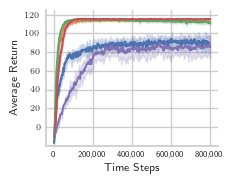

In [6]:
fig = plt.figure(figsize=(2.49, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'episode_reward_mean', hue_order=algorithms, 
               algorithms=algorithms, legend=False)
ax.set_ylim([-20.0, 125.0])
plt.ylabel('Average Return', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
#legend = ax.legend(fontsize=6, title=None, facecolor="white", loc='lower center', ncol=5, bbox_to_anchor=(1, 1.5))
ax.tick_params(which='major', pad=-2)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(np.arange(0, 140, 20), fontsize=6)
#export_legend(legend)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.tight_layout()
plt.savefig('return.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Episodes Solved

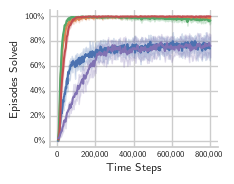

In [7]:
fig = plt.figure(figsize=(2.49, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'custom_metrics/solved_mean', hue_order=algorithms,
              algorithms=algorithms, legend=False)
ax.set_ylim([-0.05, 1.05])
plt.ylabel('Episodes Solved', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(np.arange(0.0,1.2, 0.2), fontsize=6)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

fig.tight_layout()
plt.savefig('solved.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Episode Length

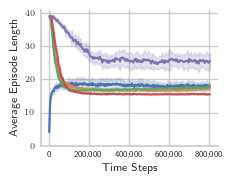

In [8]:
fig = plt.figure(figsize=(2.49, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'episode_len_mean', hue_order=algorithms,
              algorithms=algorithms, legend=False)
ax.set_ylim([0.0, 41.0])
plt.ylabel('Average Episode Length', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
ax.tick_params(which='major', pad=-2)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(np.arange(0, 50, 10), fontsize=6)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout()
plt.savefig('steps.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Fraction Allowed

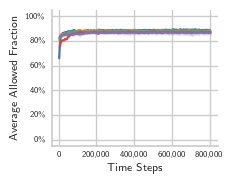

In [12]:
fig = plt.figure(figsize=(2.49, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'custom_metrics/fraction_allowed_actions_avg_mean', hue_order=algorithms,
              algorithms=algorithms, legend=False)
ax.set_ylim([-0.05, 1.05])
plt.ylabel('Average Allowed Fraction', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
# if len(algorithms) > 1:
#     ax.legend(fontsize=6, title=None, facecolor="white")
ax.tick_params(which='major', pad=-2)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(np.arange(0.0,1.2, 0.2), fontsize=6)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

fig.tight_layout()
plt.savefig('fraction_allowed.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Number of Intervals

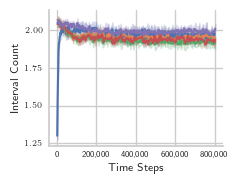

In [10]:
fig = plt.figure(figsize=(2.49, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'custom_metrics/number_intervals_max_mean', hue_order=algorithms,
              algorithms=algorithms, legend=False)
plt.ylabel('Interval Count', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
ax.tick_params(which='major', pad=-2)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(fontsize=6)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout()
plt.savefig('intervals.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Absolute Allowed Action Space

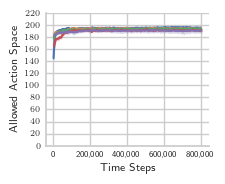

In [15]:
fig = plt.figure(figsize=(2.4, 2.0))

ax = line_plot(training_results_path, 'timesteps_total', 'custom_metrics/allowed_interval_length_avg_mean', hue_order=algorithms,
              algorithms=algorithms, legend=False)
plt.ylabel('Allowed Action Space', fontsize= 8) 
plt.xlabel('Time Steps', fontsize= 8)
ax.tick_params(which='major', pad=-2)
plt.xticks(np.arange(0, 1000000, 200000), fontsize= 6)
plt.yticks(np.arange(0, 240, 20), fontsize=6)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout()
plt.savefig('allowed.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

#### Convergence

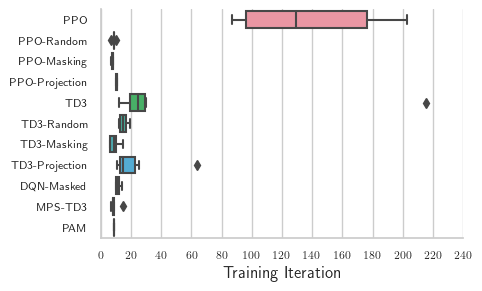

In [14]:
algorithm_results = results_training[results_training['custom_metrics/solved_mean'] > 0.8]
threshold_reached = algorithm_results[['training_iteration', 'trial_id', 'algorithm']].groupby('trial_id').min()

fig = plt.figure(figsize=set_size(360.0))

ax = sns.boxplot(data=threshold_reached, x='training_iteration', y='algorithm', 
                 order=['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection',
                        'TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked', 
                        'MPS-TD3', 'PAM'])
plt.ylabel(None) 
plt.xlabel('Training Iteration')
plt.xlim(0.0, 240.0)
plt.xticks(np.arange(0, 260, 20), fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
fig.tight_layout()
plt.savefig('boxplots.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [15]:
threshold_reached.groupby('algorithm').median()

,training_iteration
algorithm,
DQN-Masked,11.5
MPS-TD3,8.0
PAM,9.0
PPO,129.0
PPO-Masked,69.0
PPO-Masking,8.0
PPO-Projection,10.5
PPO-Random,9.0
TD3,24.5
